In [1]:
import SNIDsn
import SNIDdataset as snid
import numpy as np
import SNePCA

import plotly.plotly as ply
import plotly.graph_objs as go
import plotly.tools as tls

import matplotlib.pyplot as plt

import pandas
from BinSpectra import lowres_dataset
import warnings
#warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')
PATH = '../Data/DataProducts/'

In [2]:
def loaddata(phase):
    dsname = "dataset{}.pickle".format(phase)
    return snid.loadPickle(PATH + dsname)


def classify_spectra(ph, dphase=5):
    warnings.filterwarnings('ignore')
    exclude = ['sn2007uy', 'sn2009er', 'sn2005ek']
    av_svm_score_dict = {}
    max_svm_score_dict = {}
    av_svm_std = {}
    for i in range(1, 5):
        for j in range(i + 1, 6):
            bin_factor_list = []
            k = 0.0027069686088658784
            while k <= 0.11098571296350102:
            #for k in range(2, 83, 10):
                datain = loaddata(phase)
                dataset_lowres = lowres_dataset(datain, k)
                snidPCA = SNePCA.SNePCA(dataset_lowres, ph - dphase, ph+phase)
                snidPCA.snidPCA()
                snidPCA.calcPCACoeffs()
                svmsc,av,std=snidPCA.runSVM(i,j,(10,7),alphamean=.5,alphaell=.1,alphasvm=10,purity=True,excludeSNe=exclude,std_rad=1.0,svm=True,count=3,fig=None,ax=None,ncv=50,markOutliers=True)
                av_svm_score_dict.setdefault('PC%d vs PC%d'%(i, j), []).append(av)
                av_svm_std.setdefault('PC%d vs PC%d'%(i, j), []).append(std)
                #max_svm_score_dict.setdefault('PC%d vs PC%d'%(i, j), []).append(max(svmsc))
                bin_factor_list.append(k)
                k = k + 0.010827874435463514
    return np.array(bin_factor_list), av_svm_score_dict, av_svm_std

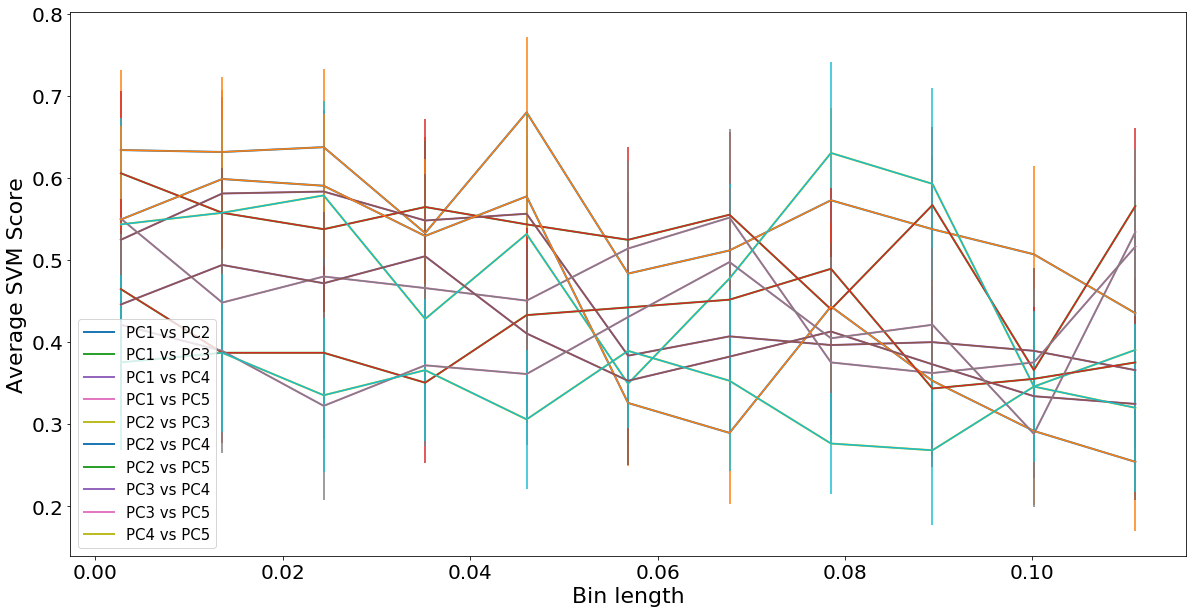

In [3]:
phase = 0
svm_score = classify_spectra(phase)
plt.figure(figsize=(20,10))
for i in range(1, 5):
    for j in range(i+1, 6):
        pcstring = "PC{} vs PC{}".format(i, j)
        #print(pcstring)
        
        plt.plot(svm_score[0], svm_score[1][pcstring], label =pcstring, linewidth=2)
        plt.errorbar(svm_score[0], svm_score[1][pcstring], yerr = svm_score[2][pcstring])
plt.xlabel('Bin length', fontsize=22)
plt.ylabel('Average SVM Score', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(fontsize=15)

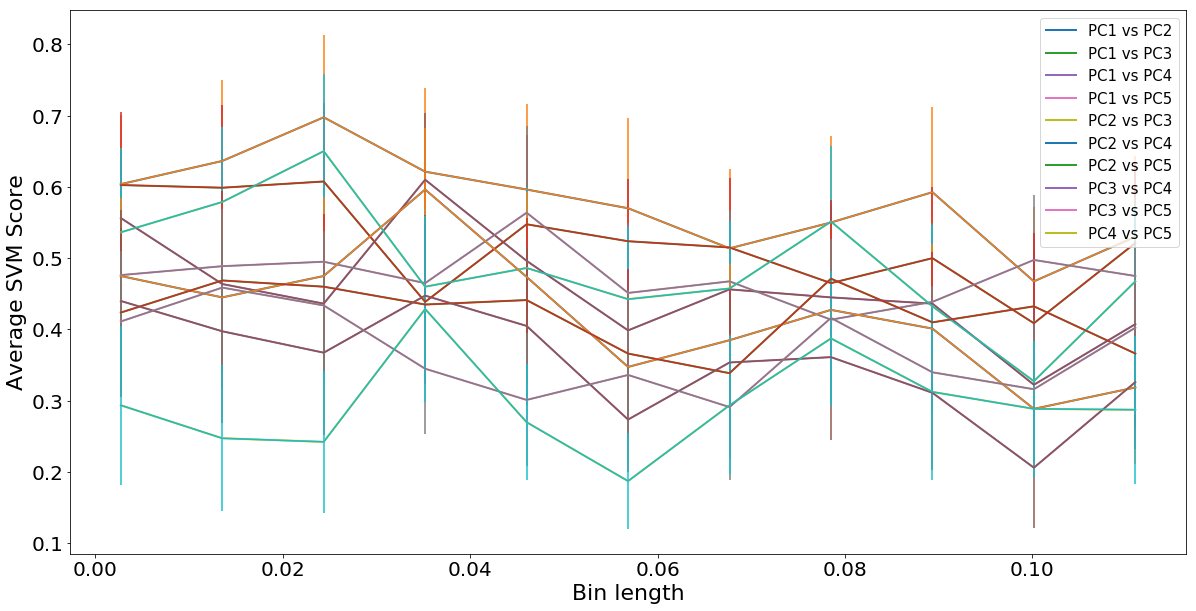

In [12]:
phase = 5
svm_score = classify_spectra(phase)
plt.figure(figsize=(20,10))
for i in range(1, 5):
    for j in range(i+1, 6):
        pcstring = "PC{} vs PC{}".format(i, j)
        #print(pcstring)
        
        plt.plot((svm_score[0]), svm_score[1][pcstring], label =pcstring, linewidth=2)
        plt.errorbar(svm_score[0], svm_score[1][pcstring], yerr = svm_score[2][pcstring])
plt.xlabel('Bin length', fontsize=22)
plt.ylabel('Average SVM Score', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(fontsize=15)

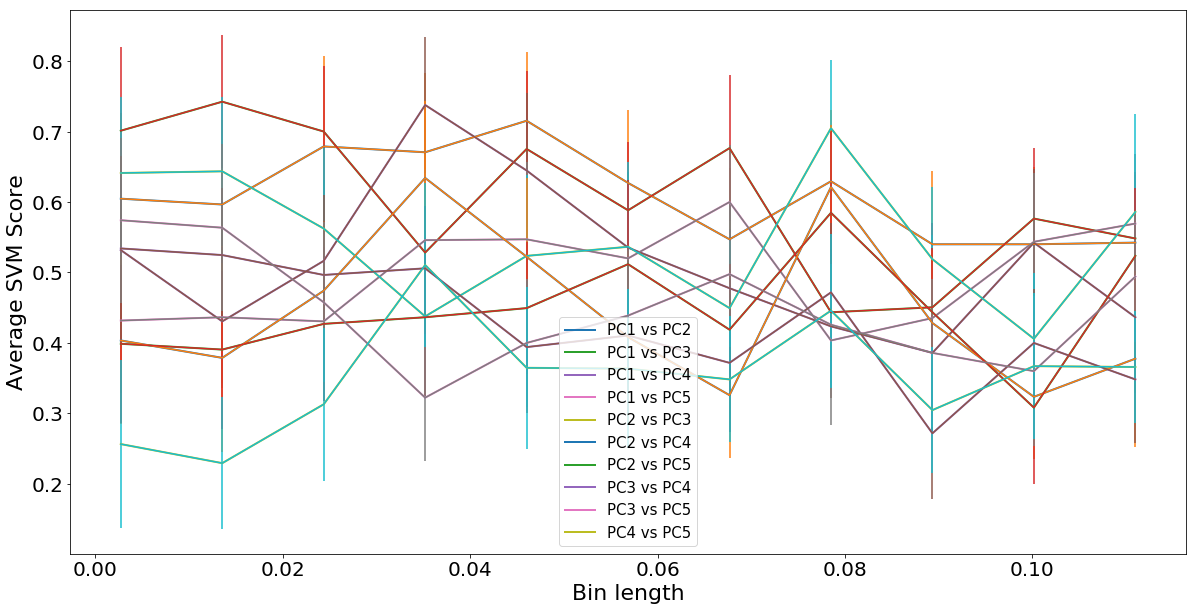

In [3]:
phase = 10
svm_score = classify_spectra(phase)
plt.figure(figsize=(20,10))
for i in range(1, 5):
    for j in range(i+1, 6):
        pcstring = "PC{} vs PC{}".format(i, j)
        #print(pcstring)
        
        plt.plot(svm_score[0], svm_score[1][pcstring], label =pcstring, linewidth=2)
        plt.errorbar(svm_score[0], svm_score[1][pcstring], yerr = svm_score[2][pcstring])
plt.xlabel('Bin length', fontsize=22)
plt.ylabel('Average SVM Score', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(fontsize=15)

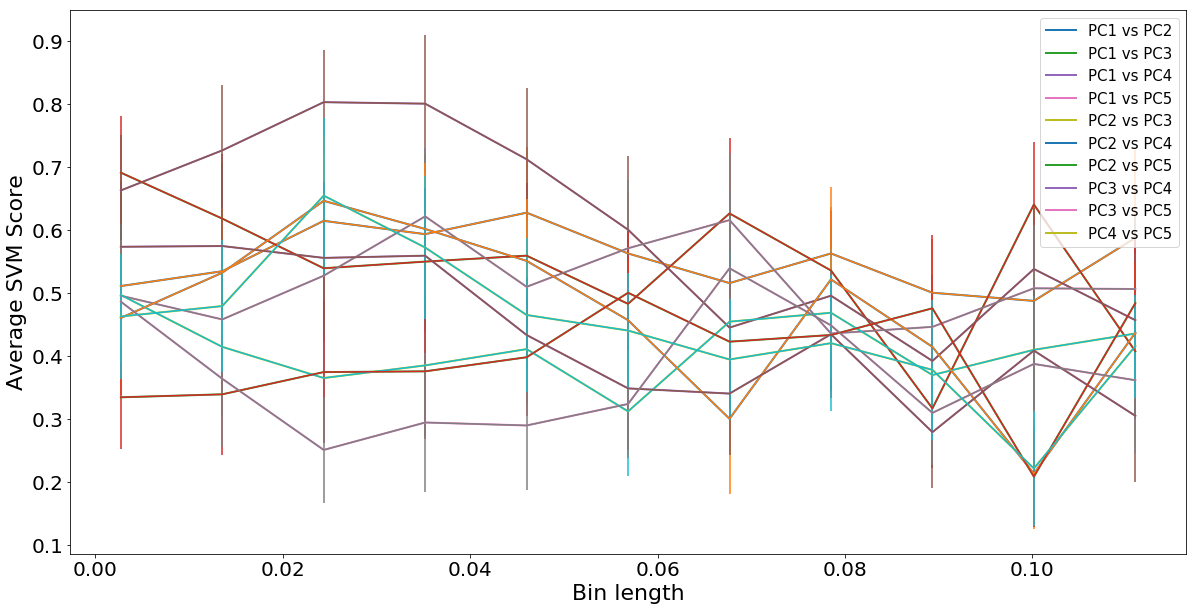

In [4]:
phase = 15
svm_score = classify_spectra(phase)
plt.figure(figsize=(20,10))
for i in range(1, 5):
    for j in range(i+1, 6):
        pcstring = "PC{} vs PC{}".format(i, j)
        #print(pcstring)
        
        plt.plot(svm_score[0], svm_score[1][pcstring], label =pcstring, linewidth=2)
        plt.errorbar(svm_score[0], svm_score[1][pcstring], yerr = svm_score[2][pcstring])
plt.xlabel('Bin length', fontsize=22)
plt.ylabel('Average SVM Score', fontsize=22)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.legend(fontsize=15)

$\overset{\circ}{A}$

In [1]:
import SNIDdataset as snid
from BinSpectra import mybinspec
import matplotlib.pyplot as plt
dataset0 = snid.loadPickle('../Data/DataProducts/dataset0.pickle')
wvl = dataset0["sn1998dt"].wavelengths
flux = dataset0["sn1998dt"].data.astype('float64')
uncer = dataset0["sn1998dt"].smooth_uncertainty

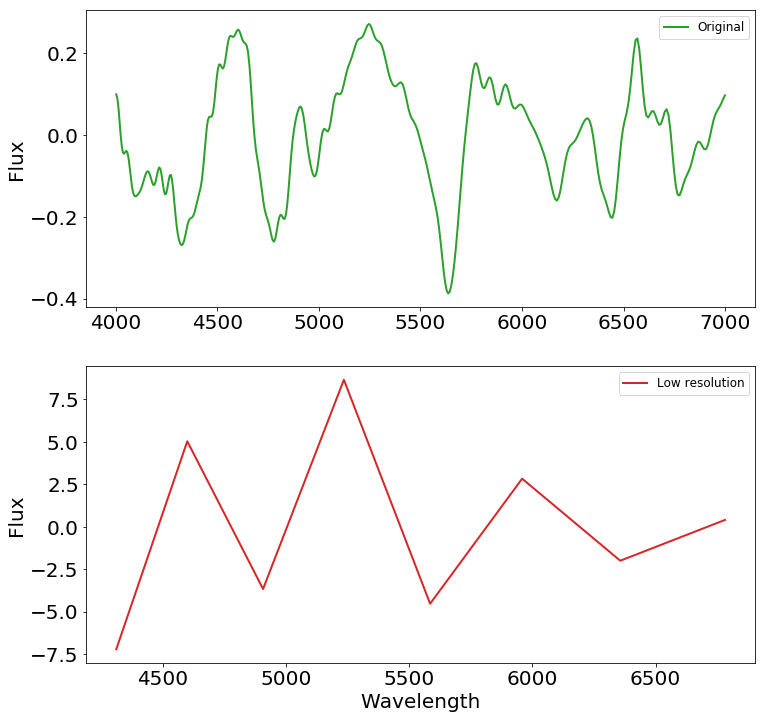

In [41]:
ns = mybinspec(wvl, flux, uncer, 259)
fig, axs = plt.subplots(2, figsize=(12,12))
#fig.suptitle('Bin length = %.2f'%(wbin), fontsize=20)
axs[0].plot(wvl, flux, 'tab:green', linewidth=2, label = "Original")
axs[1].plot(ns[0], ns[1], 'tab:red', linewidth=2, label = "Low resolution")
axs[1].set_xlabel('Wavelength', fontsize=20)
axs[0].set_ylabel('Flux', fontsize='20')
axs[1].set_ylabel('Flux', fontsize='20')
axs[0].tick_params(axis='both', which='major', labelsize=20)
axs[1].tick_params(axis='both', which='major', labelsize=20)
axs[0].legend(loc="upper right", fontsize = '12')
axs[1].legend(loc="upper right", fontsize = '12')